In [9]:
import pandas as pd
import matplotlib.pyplot as plt
KS_query = pd.read_csv("/content/KS_Covid_Contributions.csv")

In [10]:
df = pd.DataFrame(KS_query)
df = df.sort_values(by = ["date", "county"], ascending = True,)
df = df.fillna(value = 0.0)

In [3]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [4]:
most_recent = df['date'].max()
recent_df = df[df['date'] == most_recent]

In [5]:
ks_df_pie = recent_df[{'date', 'county', 'county_deaths', 'state_deaths', 'total_death_contribution'}].set_index('county')

In [6]:
total_others = ks_df_pie['date'].count() - 5
ks_df_pie_rest = ks_df_pie.nsmallest(total_others, 'total_death_contribution')
death_cont = ks_df_pie_rest['total_death_contribution'].sum()
date_pie = ks_df_pie_rest['date'].max()
st_dths = ks_df_pie_rest['state_deaths'].max()
cnty_dths = ks_df_pie_rest['county_deaths'].sum()
ks_df_pie_rest = pd.DataFrame({'date' : [date_pie], 'total_death_contribution' : [death_cont], 'county' : ['All Other Counties'], 'state_deaths' : [st_dths], 'county_deaths' : [cnty_dths]}).set_index('county')

In [7]:
ks_df_updated_pie = ks_df_pie.nlargest(5, 'total_death_contribution')
ks_df_updated_pie = ks_df_updated_pie.append(ks_df_pie_rest)

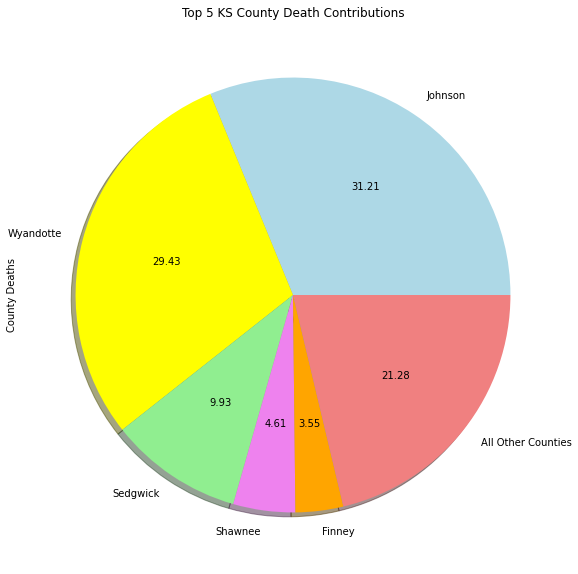

In [8]:
ks_df_updated_pie.plot(x = 'total_death_contribution', y = 'county_deaths', kind = 'pie', figsize = (10,10), legend = False, label = 'County Deaths', title = 'Top 5 KS County Death Contributions', colors = ['lightblue','yellow','lightgreen','violet','orange', 'lightcoral'], autopct = '%1.2f', shadow = True)

The pie chart above shows 5 Kansas counties with the most Covid-19 deaths, compared to the total Covid-19 deaths in Kansas, as of 07/02/2020. As you can see, Johnson & Wyandotte county contribute to almost two-thirds of Kansas' total deaths. Surprisingly, Sedwick county only contributes ~10% of these deaths, even though it has the third most deaths of all Kansas counties. The "All Other Counties" slice, is the total percentage of deaths for 91 other Kansas counties. Johnson county has contributed to more deaths than the 93 lowest contributing counties combined.